<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/xpW4D4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Data Loading and Exploration

## Load the dataset using Pandas. Check for null values and understand data types.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/AAPL, 1D 01012007-12072023.csv')

df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


Short descriptions of the columns:

**volume:** Total number of shares or contracts traded during the time period.

**vwap (Volume Weighted Average Price):** Average price of the asset, weighted by volume.

**open:** Opening price of the asset for the time period.

**close:** Closing price of the asset for the time period.

**high:** Highest price reached during the time period.

**low:** Lowest price reached during the time period.

**time:** Timestamp indicating the start of the time period (likely in Unix format).

**transactions:** Number of trades or transactions executed during the time period.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [ ]:
# check null values
print(df.isnull().sum())

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64


In [ ]:
# Check if all values in the 'transactions' column are unique
is_unique = df['transactions'].nunique() == len(df)
print(is_unique)

False


## Examine the time series properties of the data (e.g., frequency, trends).

In [ ]:
# Convert time column to datetime
df['date'] = pd.to_datetime(df['time'], unit='s')

df.head()

,volume,vwap,open,close,high,low,time,transactions,date
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737,2007-01-03 05:00:00
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333,2007-01-04 05:00:00
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050,2007-01-05 05:00:00
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547,2007-01-08 05:00:00
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578,2007-01-09 05:00:00


In [ ]:
#drop the column 'time'
df.drop(columns=['time'], inplace=True)
df.head()

,volume,vwap,open,close,high,low,transactions,date
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,189737,2007-01-03 05:00:00
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,136333,2007-01-04 05:00:00
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,141050,2007-01-05 05:00:00
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,130547,2007-01-08 05:00:00
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,569578,2007-01-09 05:00:00


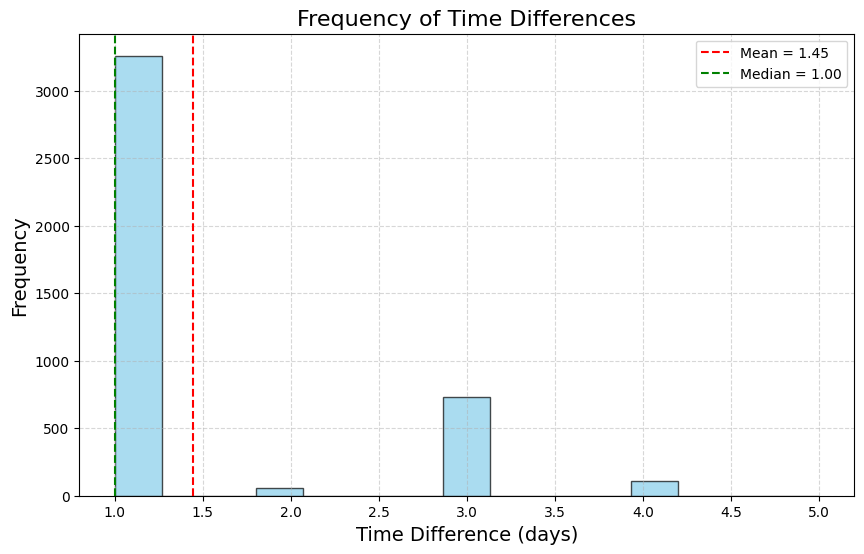

In [ ]:
#find the differences between dates
time_diff_days = df['date'].diff().dt.days.dropna()

# Plot the frequency of time differences
plt.figure(figsize=(10, 6))
plt.hist(time_diff_days, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Time Difference (days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Time Differences', fontsize=16)

# Add grid lines and statistics
plt.grid(True, linestyle='--', alpha=0.5)
mean_diff = time_diff_days.mean()
median_diff = time_diff_days.median()
plt.axvline(mean_diff, color='red', linestyle='--', label=f'Mean = {mean_diff:.2f}')
plt.axvline(median_diff, color='green', linestyle='--', label=f'Median = {median_diff:.2f}')
plt.legend()

plt.show()

In [ ]:
# create a new column 'diff_date'
df['diff_date'] = df['date'].diff().dt.days.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volume        4159 non-null   float64       
 1   vwap          4159 non-null   float64       
 2   open          4159 non-null   float64       
 3   close         4159 non-null   float64       
 4   high          4159 non-null   float64       
 5   low           4159 non-null   float64       
 6   transactions  4159 non-null   int64         
 7   date          4159 non-null   datetime64[ns]
 8   diff_date     4158 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 292.6 KB


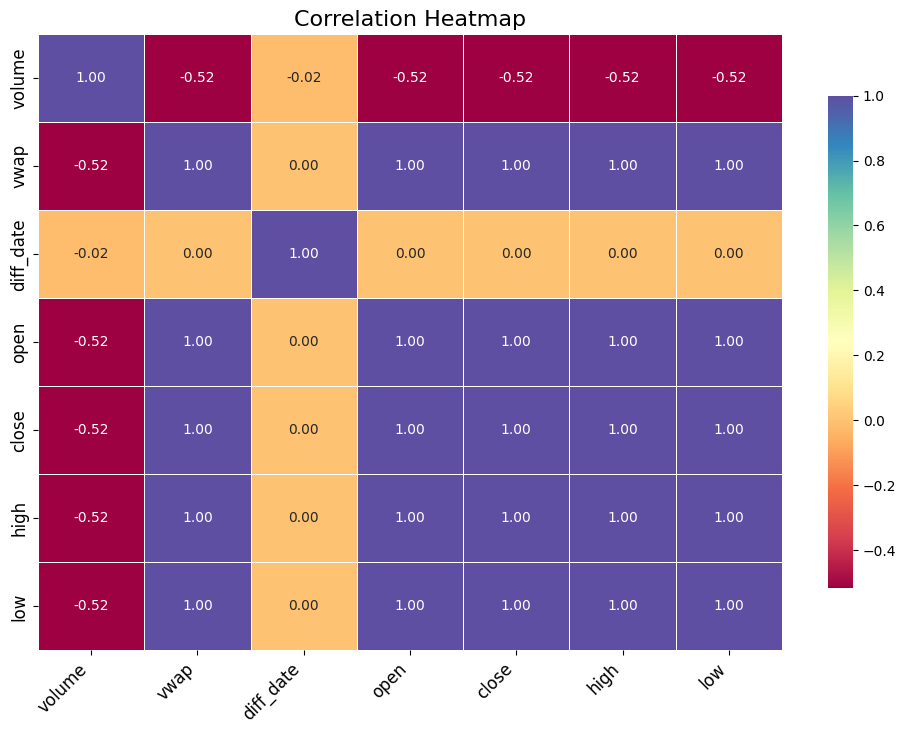

In [ ]:
#Examine trends
#Create a heatmap for all numerical columns accept 'transactions'
num_columns = ['volume', 'vwap', 'diff_date', "open", "close", "high", "low"]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df[num_columns].corr(),
    annot=True,
    cmap='Spectral',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

It turns out that there is a direct correlation between all indicators except 'volume' (but there is a significant inverse correlation). And there is no correlation between the time interval between transactions and other numerical values

# Data Visualization

## Utilize Matplotlib to plot closing prices and traded volume over time.

Text(0.5, 1.0, 'Volume Over Time')

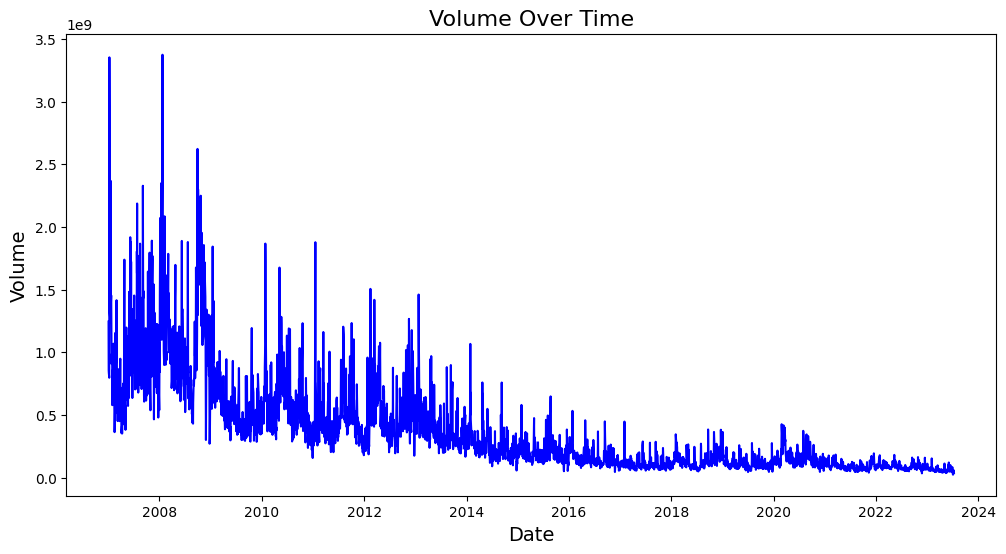

In [ ]:
# create a plot for volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['volume'], label='Volume', linestyle='-', color='b')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.title('Volume Over Time', fontsize=16)

Text(0.5, 1.0, 'VWAP Over Time')

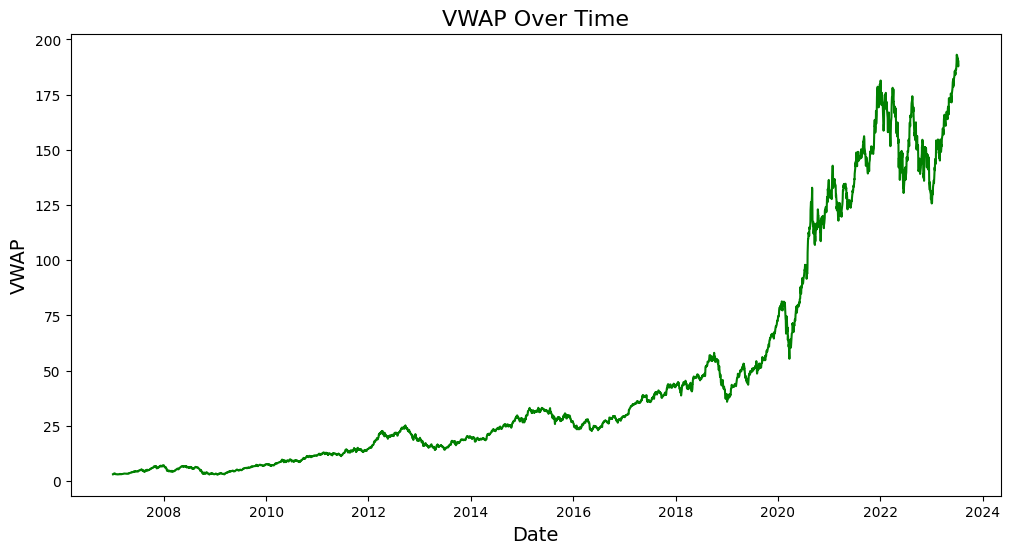

In [ ]:
# create a plot for VWAP over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['vwap'], label='VWAP', linestyle='-', color='g')
plt.xlabel('Date', fontsize=14)
plt.ylabel('VWAP', fontsize=14)
plt.title('VWAP Over Time', fontsize=16)

Text(0.5, 1.0, 'Closing Price Over Time')

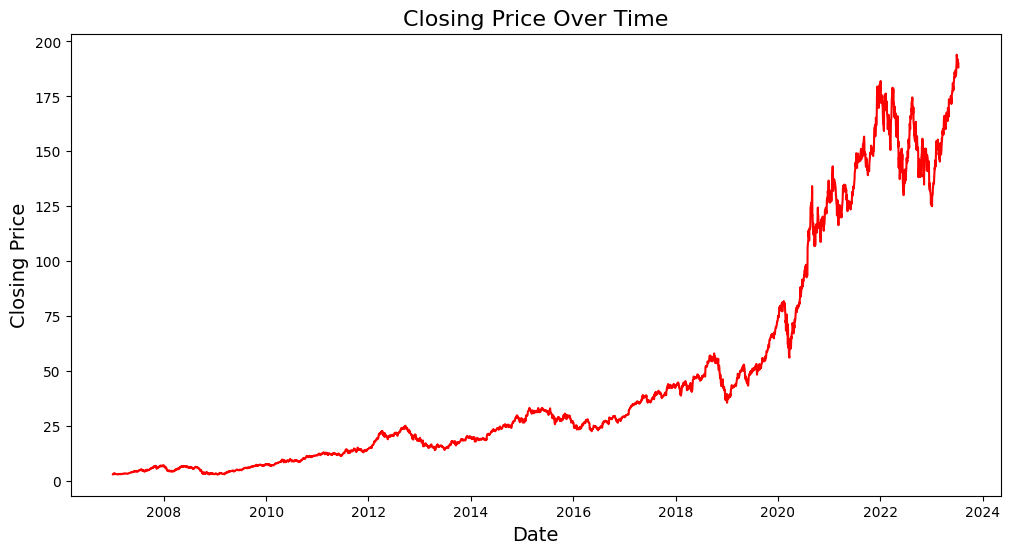

In [ ]:
# create a plot for Closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price', linestyle='-', color='r')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.title('Closing Price Over Time', fontsize=16)

## Create a candlestick chart to depict high and low prices

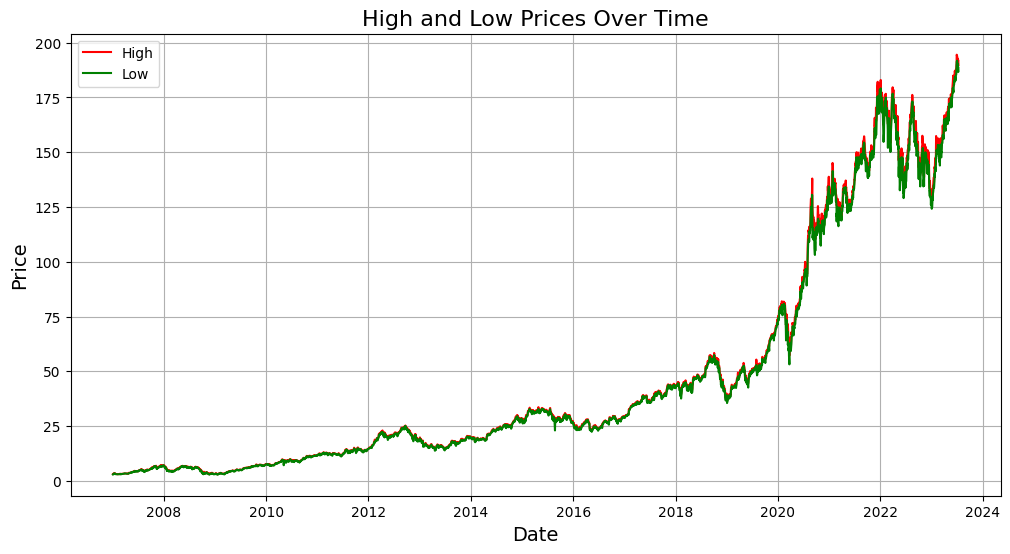

In [ ]:
# Create a candlestick chart to depict high and low prices
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['high'], label='High', linestyle='-', color='r')
plt.plot(df['date'], df['low'], label='Low', linestyle='-', color='g')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('High and Low Prices Over Time', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install mpl_finance

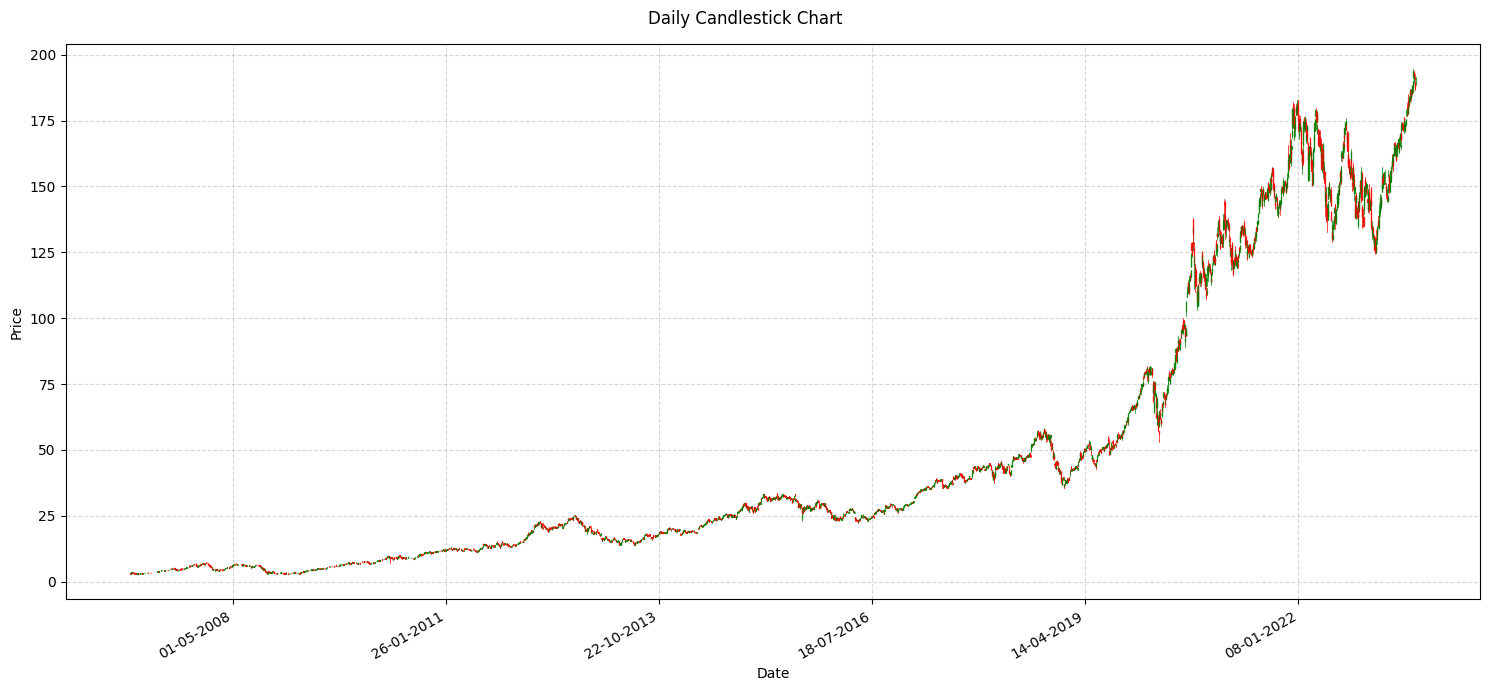

In [ ]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import datetime
import matplotlib.dates as mdates

# Assuming df is your DataFrame and it's already loaded with the necessary data
# Prepare data for candlestick using OHLC format
ohlc = df[['date', 'open', 'high', 'low', 'close']].copy()
ohlc['date'] = mdates.date2num(pd.to_datetime(ohlc['date']))

# Create the figure and axis for the candlestick chart
fig, ax = plt.subplots(figsize=(15, 7))

# Plot candlestick chart
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart')

# Format the date on x-axis
date_format = mdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

# Grid and layout adjustments
ax.grid(True, linestyle='--', alpha=0.5)
fig.tight_layout()

# Display the candlestick chart
plt.show()

# Statistical Analysis

## Compute summary statistics (mean, median, standard deviation) for key columns.

In [ ]:
# Calculate summary statistics for key columns
summary_stats = df[['volume', 'vwap', 'open', 'close', 'high', 'low']].describe().T

# Add median and standard deviation to the summary statistics
summary_stats['median'] = df[['volume', 'vwap', 'open', 'close', 'high', 'low']].median()
summary_stats['std_dev'] = df[['volume', 'vwap', 'open', 'close', 'high', 'low']].std()

In [ ]:
summary_stats

,count,mean,std,min,25%,50%,75%,max,median,std_dev
volume,4159.0,3.662925e+08,3.724793e+08,2.422234e+07,1.067497e+08,2.136463e+08,4.965321e+08,3.373042e+09,2.136463e+08,3.724793e+08
vwap,4159.0,4.639138e+01,5.027756e+01,2.841000e+00,1.193620e+01,2.588520e+01,5.215415e+01,1.931020e+02,2.588520e+01,5.027756e+01
open,4159.0,4.636279e+01,5.023559e+01,2.835400e+00,1.195570e+01,2.577500e+01,5.226375e+01,1.937800e+02,2.577500e+01,5.023559e+01
close,4159.0,4.639606e+01,5.029348e+01,2.792900e+00,1.194715e+01,2.582500e+01,5.223125e+01,1.939700e+02,2.582500e+01,5.029348e+01
high,4159.0,4.688113e+01,5.084387e+01,2.928600e+00,1.202840e+01,2.626280e+01,5.262625e+01,1.944800e+02,2.626280e+01,5.084387e+01
low,4159.0,4.586579e+01,4.968010e+01,2.792900e+00,1.185360e+01,2.568000e+01,5.179625e+01,1.917600e+02,2.568000e+01,4.968010e+01


## Analyze closing prices with a moving average.

50-Day Moving Average: Often used to identify short- to medium-term trends.

200-Day Moving Average: Popular for analyzing long-term trends.

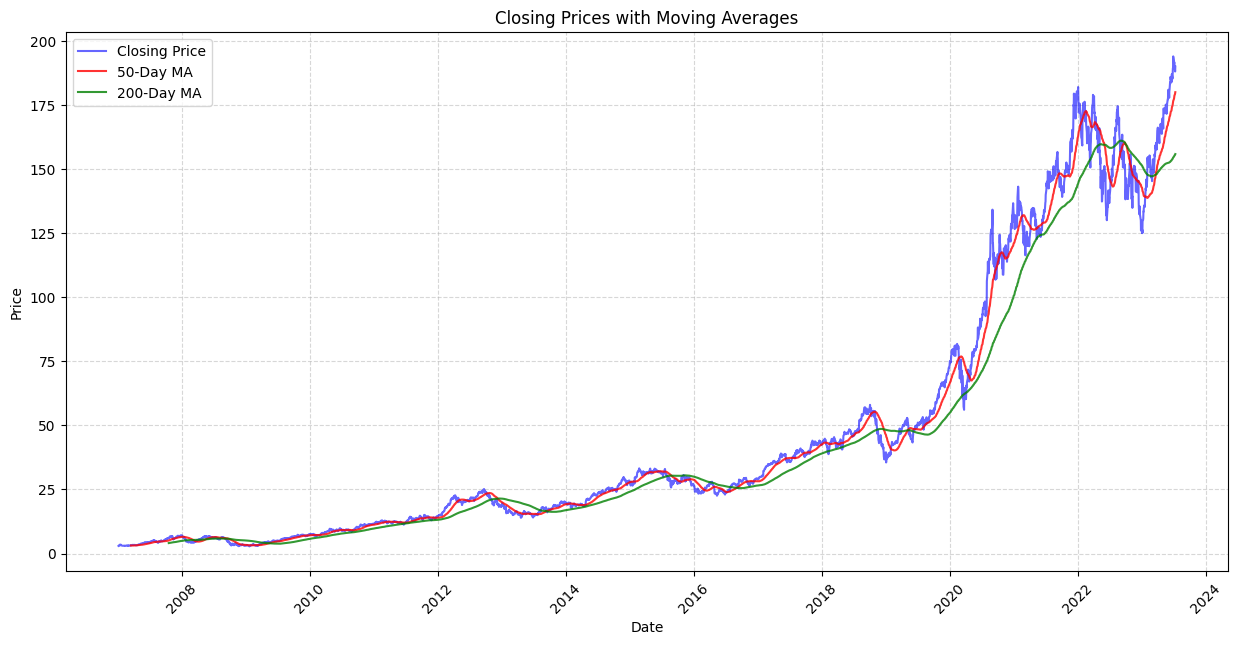

In [ ]:
# Sort by date just in case
df = df.sort_values('date')

# Calculate the moving averages
df['MA_50'] = df['close'].rolling(window=50).mean()   # 50-day moving average
df['MA_200'] = df['close'].rolling(window=200).mean() # 200-day moving average

# Plot closing prices and moving averages
plt.figure(figsize=(15, 7))
plt.plot(df['date'], df['close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df['date'], df['MA_50'], label='50-Day MA', color='red', alpha=0.8)
plt.plot(df['date'], df['MA_200'], label='200-Day MA', color='green', alpha=0.8)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices with Moving Averages')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate date labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Hypothesis Testing

## Execute a t-test to compare average closing prices across different years.

In [ ]:
# Extract the year from the date column
df['year'] = df['date'].dt.year

# Get the unique years in the dataset
years = df['year'].unique()

# Perform t-tests between each pair of years
for i in range(len(years)):
    for j in range(i+1, len(years)):
        year1 = years[i]
        year2 = years[j]

        # Get closing prices for each year
        prices_year1 = df[df['year'] == year1]['close']
        prices_year2 = df[df['year'] == year2]['close']

        # Perform the t-test
        t_stat, p_value = stats.ttest_ind(prices_year1, prices_year2, equal_var=False)

        # Print the result
        print(f"T-test between {year1} and {year2}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}")
        alpha = 0.05
        if p_value < alpha:
            print("There is a significant differences in average closing prices across these years. This suggests that stock prices have experienced substantial shifts over time.")
        else:
            print("There is no significant differences in average closing prices across these years.")

T-test between 2007 and 2008: t-statistic = -4.4605, p-value = 1.0104e-05
There is a significant differences in average closing prices across these years. This suggests that stock prices have experienced substantial shifts over time.
T-test between 2007 and 2009: t-statistic = -5.5304, p-value = 5.1856e-08
There is a significant differences in average closing prices across these years. This suggests that stock prices have experienced substantial shifts over time.
T-test between 2007 and 2010: t-statistic = -40.5113, p-value = 6.3906e-160
There is a significant differences in average closing prices across these years. This suggests that stock prices have experienced substantial shifts over time.
T-test between 2007 and 2011: t-statistic = -85.4183, p-value = 5.2687e-284
There is a significant differences in average closing prices across these years. This suggests that stock prices have experienced substantial shifts over time.
T-test between 2007 and 2012: t-statistic = -93.5858, p-valu

**Significant Differences:** Most comparisons show extremely low p-values (e.g., p < 0.05), indicating significant differences in average closing prices across these years. This suggests that stock prices have experienced substantial shifts over time.

**Notable Exception:** The comparison between 2008 and 2009 has a p-value of 0.1421, which is above the typical significance level of 0.05. This indicates no statistically significant difference in the average closing prices between these two years, possibly reflecting market stabilization after the 2008 financial crisis.

**Large Negative t-statistics:** The consistently large negative t-statistics imply that the mean closing price in the earlier year was generally lower than in the later year, consistent with a general upward trend in stock prices over the analyzed period.

Magnitude of Change: The magnitude of the t-statistics tends to increase over longer time spans (e.g., 2007 vs. 2022), indicating more pronounced differences in average prices over more extended periods.

**Significant Differences:** Most comparisons show extremely low p-values (e.g., p < 0.05), indicating significant differences in average closing prices across these years. This suggests that stock prices have experienced substantial shifts over time.

**Notable Exception:** The comparison between 2008 and 2009 has a p-value of 0.1421, which is above the typical significance level of 0.05. This indicates no statistically significant difference in the average closing prices between these two years, possibly reflecting market stabilization after the 2008 financial crisis.

**Large Negative t-statistics:** The consistently large negative t-statistics imply that the mean closing price in the earlier year was generally lower than in the later year, consistent with a general upward trend in stock prices over the analyzed period.

**Magnitude of Change:** The magnitude of the t-statistics tends to increase over longer time spans (e.g., 2007 vs. 2022), indicating more pronounced differences in average prices over more extended periods.

## Examine daily returns’ distribution and test for normality using SciPy.

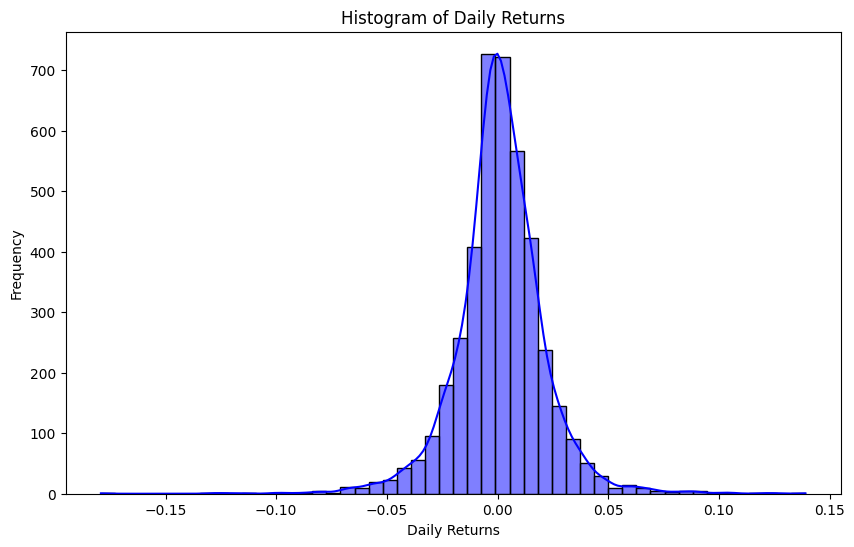

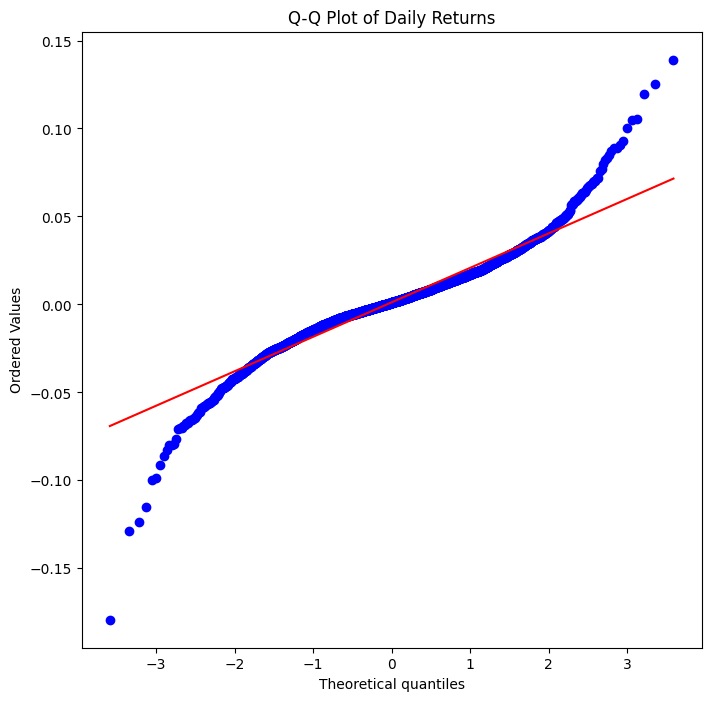

Shapiro-Wilk Test: W=0.9407, p-value=6.1809e-38
The data does not appear to be normally distributed.


In [ ]:
# Calculate daily returns (adjust this if your data structure is different)
# Assuming 'Close' is the column with daily closing prices
df['daily_returns'] = df['close'].pct_change().dropna()

# Drop NaN values from returns
daily_returns = df['daily_returns'].dropna()

# Visualize Distribution
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, bins=50, kde=True, color='blue')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
stats.probplot(daily_returns, dist="norm", plot=plt)
plt.title('Q-Q Plot of Daily Returns')
plt.show()

# Test for Normality

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(daily_returns)
print(f"Shapiro-Wilk Test: W={shapiro_stat:.4f}, p-value={shapiro_p:.4e}")
if shapiro_p > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")


# Advanced Statistical Techniques (Bonus)

In [ ]:
df.head()

,volume,vwap,open,close,high,low,transactions,date,diff_date,MA_50,MA_200,year,daily_returns
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,189737,2007-01-03 05:00:00,NaN,NaN,NaN,2007,NaN
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,136333,2007-01-04 05:00:00,1.0,NaN,NaN,2007,0.022186
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,141050,2007-01-05 05:00:00,1.0,NaN,NaN,2007,-0.007126
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,130547,2007-01-08 05:00:00,3.0,NaN,NaN,2007,0.004938
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,569578,2007-01-09 05:00:00,1.0,NaN,NaN,2007,0.083079


In [ ]:
# Define the moving average window size
window_size_50 = 50
window_size_200 = 200

# Calculate Moving Averages using NumPy's convolve
weights_50 = np.ones(window_size_50) / window_size_50
weights_200 = np.ones(window_size_200) / window_size_200

ma_50_np = np.convolve(df['close'], weights_50, mode='valid')
ma_200_np = np.convolve(df['close'], weights_200, mode='valid')

# Pad the moving averages with NaNs to match the length of the DataFrame
ma_50_padded = np.concatenate((np.full(window_size_50 - 1, np.nan), ma_50_np))
ma_200_padded = np.concatenate((np.full(window_size_200 - 1, np.nan), ma_200_np))

# Assign the padded moving averages to the DataFrame using .loc[]
df.loc[:, 'MA_50_np'] = ma_50_padded
df.loc[:, 'MA_200_np'] = ma_200_padded

In [ ]:
df.head()

,volume,vwap,open,close,high,low,transactions,date,diff_date,MA_50,MA_200,year,daily_returns,MA_50_np,MA_200_np
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,189737,2007-01-03 05:00:00,NaN,NaN,NaN,2007,NaN,NaN,NaN
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,136333,2007-01-04 05:00:00,1.0,NaN,NaN,2007,0.022186,NaN,NaN
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,141050,2007-01-05 05:00:00,1.0,NaN,NaN,2007,-0.007126,NaN,NaN
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,130547,2007-01-08 05:00:00,3.0,NaN,NaN,2007,0.004938,NaN,NaN
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,569578,2007-01-09 05:00:00,1.0,NaN,NaN,2007,0.083079,NaN,NaN


In [ ]:
# Drop rows with NaN values for accurate correlation calculation
cleaned_data = df.dropna(subset=['MA_50_np', 'MA_200_np', 'volume'])

# Calculate correlation between MA_50_np and volume
corr_ma50_volume = np.corrcoef(cleaned_data['MA_50_np'], cleaned_data['volume'])[0, 1]

# Calculate correlation between MA_200_np and volume
corr_ma200_volume = np.corrcoef(cleaned_data['MA_200_np'], cleaned_data['volume'])[0, 1]

print(f"Correlation between MA_50_np and Volume: {corr_ma50_volume:.4f}")
print(f"Correlation between MA_200_np and Volume: {corr_ma200_volume:.4f}")


Correlation between MA_50_np and Volume: -0.5072
Correlation between MA_200_np and Volume: -0.5035


This indicates a moderate negative correlation, suggesting that as the 50-day and 200-day moving average increases, trading volume tends to decrease, and vice versa.

In [ ]:
cleaned_data.head()

,volume,vwap,open,close,high,low,transactions,date,diff_date,MA_50,MA_200,year,daily_returns,MA_50_np,MA_200_np
199,1.127612e+09,6.1204,6.1675,6.1696,6.1800,6.0421,206690,2007-10-17 04:00:00,1.0,5.102888,4.089109,2007,0.018691,5.102888,4.089109
200,8.242661e+08,6.1698,6.1250,6.1964,6.2211,6.1089,148446,2007-10-18 04:00:00,1.0,5.131102,4.105126,2007,0.004344,5.131102,4.105126
201,1.291553e+09,6.1627,6.2229,6.0864,6.2368,6.0714,230652,2007-10-19 04:00:00,1.0,5.162552,4.120262,2007,-0.017752,5.162552,4.120262
202,1.649497e+09,6.2839,6.0839,6.2271,6.2464,6.0704,295058,2007-10-22 04:00:00,3.0,5.197808,4.136210,2007,0.023117,5.197808,4.136210
203,1.794793e+09,6.6436,6.7343,6.6486,6.7357,6.5271,318875,2007-10-23 04:00:00,1.0,5.239502,4.154190,2007,0.067688,5.239502,4.154191


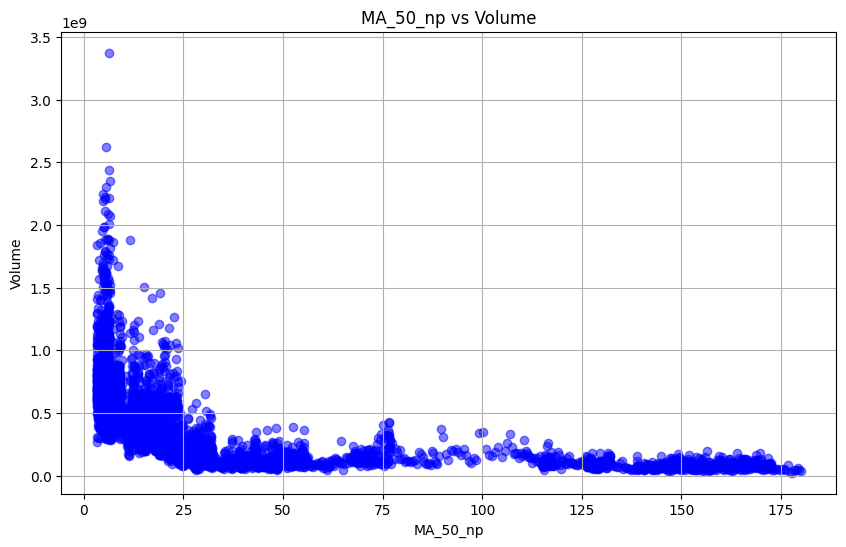

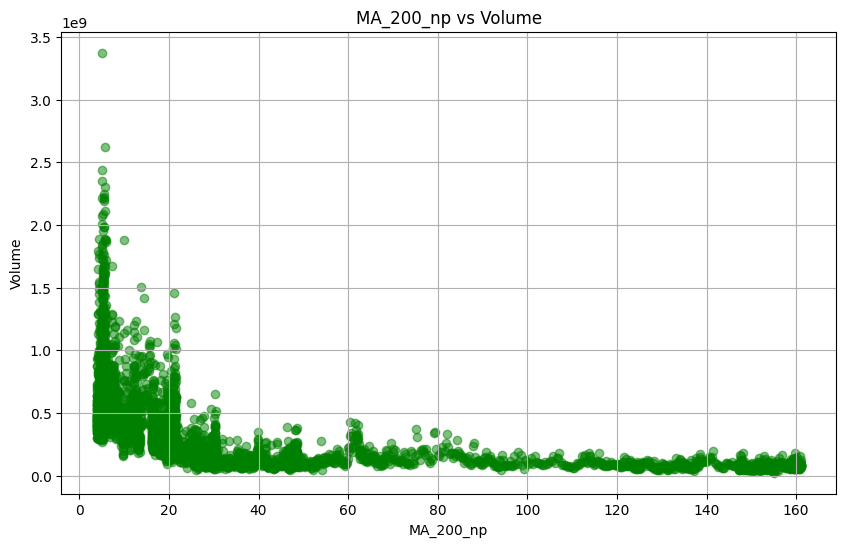

In [ ]:
# Scatter plot for MA_50_np vs Volume
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['MA_50_np'], cleaned_data['volume'], alpha=0.5, color='blue')
plt.title('MA_50_np vs Volume')
plt.xlabel('MA_50_np')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Scatter plot for MA_200_np vs Volume
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['MA_200_np'], cleaned_data['volume'], alpha=0.5, color='green')
plt.title('MA_200_np vs Volume')
plt.xlabel('MA_200_np')
plt.ylabel('Volume')
plt.grid(True)
plt.show()